In [2]:
#formålet med denne notebook er at reproducere figur 28 på side 40 af baggrundsrapporten
import numpy as np 
import matplotlib.pyplot as plt
from ResultsFile import ResultsFile

In [3]:
climateYears = [1985,1987,1996,2007,2008,2009,2010,2011,2012,2013,2014,2015]
files = []
for i in range(len(climateYears)):
    files.append(ResultsFile("../results/2030_"+str(climateYears[i])+"_.txt"))

In [9]:
files[0].splitted

['hour',
 'DK1_demand',
 'DK1_surplus',
 'DK1_EENS',
 'DK1_PV',
 'DK1_WS',
 'DK1_WL',
 'DK1_CSP',
 'DK1_HY',
 'DK1_HYlimit',
 'DK1_OtherRes',
 'DK1_OtherNonRes',
 'DK1_ICHP',
 'DK1_nonTDProd',
 'DK1_plannedOutage',
 'DK1_unplannedOutage',
 'DK2_demand',
 'DK2_surplus',
 'DK2_EENS',
 'DK2_PV',
 'DK2_WS',
 'DK2_WL',
 'DK2_CSP',
 'DK2_HY',
 'DK2_HYlimit',
 'DK2_OtherRes',
 'DK2_OtherNonRes',
 'DK2_ICHP',
 'DK2_nonTDProd',
 'DK2_plannedOutage',
 'DK2_unplannedOutage',
 'DKBO_demand',
 'DKBO_surplus',
 'DKBO_EENS',
 'DKBO_PV',
 'DKBO_WS',
 'DKBO_WL',
 'DKBO_CSP',
 'DKBO_HY',
 'DKBO_HYlimit',
 'DKBO_OtherRes',
 'DKBO_OtherNonRes',
 'DKBO_ICHP',
 'DKBO_nonTDProd',
 'DKBO_plannedOutage',
 'DKBO_unplannedOutage',
 'DKKF_demand',
 'DKKF_surplus',
 'DKKF_EENS',
 'DKKF_PV',
 'DKKF_WS',
 'DKKF_WL',
 'DKKF_CSP',
 'DKKF_HY',
 'DKKF_HYlimit',
 'DKKF_OtherRes',
 'DKKF_OtherNonRes',
 'DKKF_ICHP',
 'DKKF_nonTDProd',
 'DKKF_plannedOutage',
 'DKKF_unplannedOutage',
 'DKEI_demand',
 'DKEI_surplus',
 'DKEI_E

Hvis det, der plottes er med energiøer + Kriegers flak:

In [22]:
i = 0
nodes = ["DK1", "DK2", "DKBO", "DKKF", "DKEI", "NOn","NOm","NOs","SE1","SE2","SE3","SE4","FI","DELU","AT","NL","GB","FR","BE","ESPT","CH","IT","EELVLT", "PL", "CZSK","HU"]
surplusDK1 = files[i].getColumn("DK1_surplus")+files[i].getColumn("DKEI_surplus")
surplusDK2 = files[i].getColumn("DK2_surplus")+files[i].getColumn("DKBO_surplus")+files[i].getColumn("DKKF_surplus")
surplusBoth = files[i].getColumn("DK2_surplus")+files[i].getColumn("DK1_surplus")+files[i].getColumn("DKBO_surplus")+files[i].getColumn("DKKF_surplus")+files[i].getColumn("DKEI_surplus")
sum = 0
for j in range(len(nodes)):
    sum += files[i].getColumn(str(nodes[j])+"_surplus")
surplusAll = sum

for i in range(len(files)-1):
    i = i+1
    surplusDK1 = np.concatenate([surplusDK1,files[i].getColumn("DK1_surplus")])
    surplusDK2 = np.concatenate([surplusDK2,files[i].getColumn("DK2_surplus")])
    surplusBoth = np.concatenate([surplusBoth,files[i].getColumn("DK2_surplus")+files[i].getColumn("DK1_surplus")+files[i].getColumn("DKBO_surplus")+files[i].getColumn("DKKF_surplus")+files[i].getColumn("DKEI_surplus")])
    sum = 0
    for j in range(len(nodes)):
        sum = files[i].getColumn(str(nodes[j])+"_surplus")
    surplusAll = np.concatenate([surplusAll,sum])

Text(0, 0.5, 'Hyppighed')

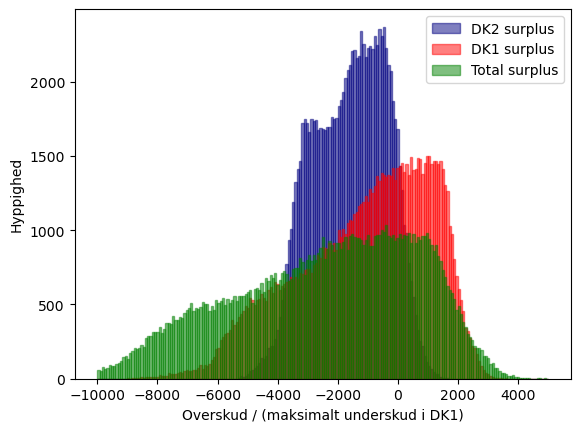

In [12]:
binsDK1 = np.linspace(-10000,5000,200)
plt.hist(-surplusDK2,alpha=0.5,bins=binsDK1,label="DK2 surplus",edgecolor = "navy",color = "navy")
plt.hist(-surplusDK1,alpha=0.5,bins=binsDK1,label="DK1 surplus",edgecolor = "red",color = "red")
plt.hist(-surplusBoth,alpha=0.5,bins=binsDK1,label="Total surplus",edgecolor = "green",color = "green")
plt.legend()
plt.xlabel("Overskud / (maksimalt underskud i DK1)")
plt.ylabel("Hyppighed")

Hvis det ikke er inklusiv energiøer:

In [29]:
i = 0
nodes = ["DK1", "DK2", "DKBO", "DKKF", "DKEI", "NOn","NOm","NOs","SE1","SE2","SE3","SE4","FI","DELU","AT","NL","GB","FR","BE","ESPT","CH","IT","EELVLT", "PL", "CZSK","HU"]
surplusDK1 = files[i].getColumn("DK1_surplus")
surplusDK2 = files[i].getColumn("DK2_surplus")
sum = 0
for j in range(len(nodes)):
    sum += files[i].getColumn(str(nodes[j])+"_surplus")
surplusAll = sum

for i in range(len(files)-1):
    i = i+1
    surplusDK1 = np.concatenate([surplusDK1,files[i].getColumn("DK1_surplus")])
    surplusDK2 = np.concatenate([surplusDK2,files[i].getColumn("DK2_surplus")])
    sum = 0
    for j in range(len(nodes)):
        sum = files[i].getColumn(str(nodes[j])+"_surplus")
    surplusAll = np.concatenate([surplusAll,sum])

Text(0, 0.5, 'Hyppighed')

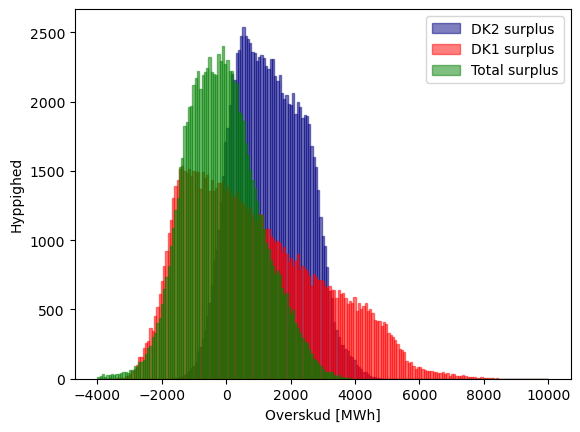

In [30]:
binsDK1 = np.linspace(-4000,10000,200)
#plt.hist(surplusDK2/abs(min(surplusDK2)),alpha=0.5,bins=binsDK1,label="DK2 surplus",edgecolor = "navy",color = "navy")
#plt.hist(surplusDK1/abs(min(surplusDK1)),alpha=0.5,bins=binsDK1,label="DK1 surplus",edgecolor = "red",color = "red")
#plt.hist(surplusAll/abs(min(surplusAll)),alpha=0.5,bins=binsDK1,label="Total surplus",edgecolor = "green",color = "green")
plt.hist(surplusDK2,alpha=0.5,bins=binsDK1,label="DK2 surplus",edgecolor = "navy",color = "navy")
plt.hist(surplusDK1,alpha=0.5,bins=binsDK1,label="DK1 surplus",edgecolor = "red",color = "red")
plt.hist(surplusAll,alpha=0.5,bins=binsDK1,label="Total surplus",edgecolor = "green",color = "green")
plt.legend()
plt.xlabel("Overskud [MWh]")
plt.ylabel("Hyppighed")

Forsøg med outageplans genereret på en anden måde - outageplans er det eneste jeg kan forestille mig, jeg reelt kan lave anderledes fra dem. Der er stort set ingen forskel, outageplan betyder ikke meget for de her plots. Det er vind/sol der dominerer.

(-1.0, 1.0)

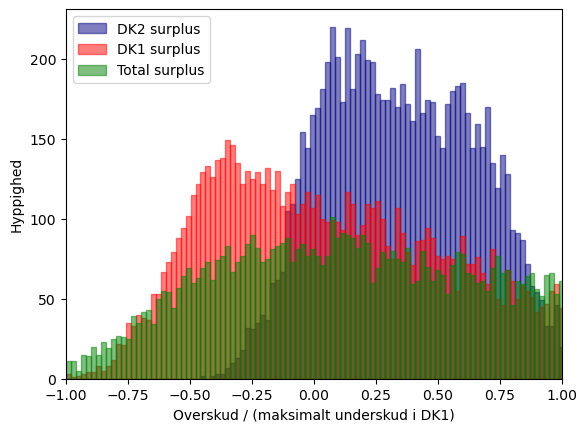

In [7]:
newTest = ResultsFile("../results/2030_1985_test.txt")
surplusDK1 = newTest.getColumn("DK1_surplus")
surplusDK2 = newTest.getColumn("DK2_surplus")
surplusBoth = newTest.getColumn("DK2_surplus")+files[0].getColumn("DK1_surplus")

binsDK1 = np.linspace(-1,3,200)
plt.hist(-surplusDK2/min(surplusDK1),alpha=0.5,bins=binsDK1,label="DK2 surplus",edgecolor = "navy",color = "navy")
plt.hist(-surplusDK1/min(surplusDK1),alpha=0.5,bins=binsDK1,label="DK1 surplus",edgecolor = "red",color = "red")
plt.hist(-surplusBoth/min(surplusDK1),alpha=0.5,bins=binsDK1,label="Total surplus",edgecolor = "green",color = "green")
plt.legend()
plt.xlabel("Overskud / (maksimalt underskud i DK1)")
plt.ylabel("Hyppighed")
plt.xlim(-1,1)

Hvorfor er der så stor forskel på figuren jeg har lavet, og den som de har fået? De skriver selv, at udstrækningen i det store og hele skyldes vindenergi. Så jeg kan lave en lignende figur kun med vindenergi og se om den store dekobling mellem DK1 og DK2 er tydelig?

In [9]:
newTest = ResultsFile("../results/2030_1985_test.txt")

Text(0, 0.5, 'Hyppighed')

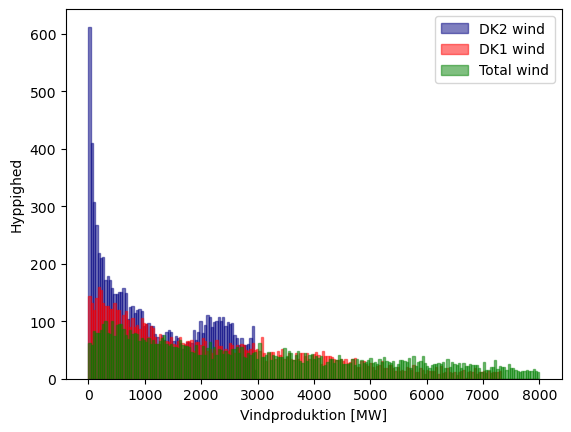

In [30]:
windDK1 = newTest.getColumn("DK1_WS")+newTest.getColumn("DK1_WL")
windDK2 = newTest.getColumn("DK2_WS")+newTest.getColumn("DK2_WL")
windBoth = windDK1+windDK2

binsDK1 = np.linspace(1,8000,200)
plt.hist(windDK2,alpha=0.5,bins=binsDK1,label="DK2 wind",edgecolor = "navy",color = "navy")
plt.hist(windDK1,alpha=0.5,bins=binsDK1,label="DK1 wind",edgecolor = "red",color = "red")
plt.hist(windBoth,alpha=0.5,bins=binsDK1,label="Total wind",edgecolor = "green",color = "green")
plt.legend()
plt.xlabel("Vindproduktion [MW]")
plt.ylabel("Hyppighed")

Text(0, 0.5, 'Hyppighed')

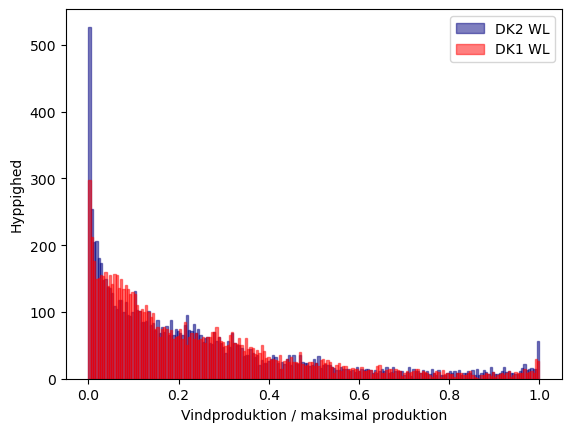

In [29]:
windDK2 = newTest.getColumn("DK2_WL")
windDK1 = newTest.getColumn("DK1_WL")

binsDK1 = np.linspace(0,1,200)
plt.hist(windDK2/(max(windDK2)),alpha=0.5,bins=binsDK1,label="DK2 WL",edgecolor = "navy",color = "navy")
plt.hist(windDK1/(max(windDK1)),alpha=0.5,bins=binsDK1,label="DK1 WL",edgecolor = "red",color = "red")
plt.legend()
plt.xlabel("Vindproduktion / maksimal produktion")
plt.ylabel("Hyppighed")

Text(0, 0.5, 'Hyppighed')

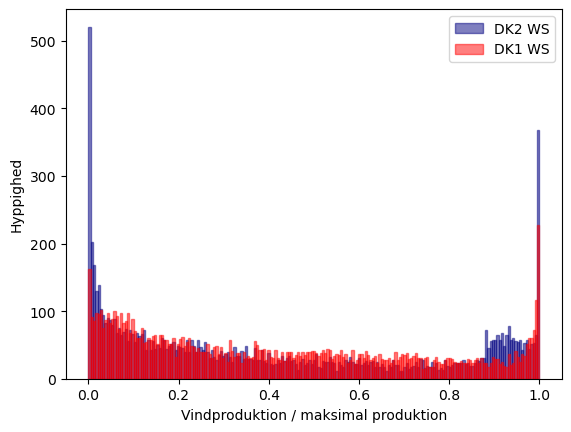

In [34]:
windDK2 = newTest.getColumn("DK2_WS")
windDK1 = newTest.getColumn("DK1_WS")

binsDK1 = np.linspace(0,1,200)
plt.hist(windDK2/(max(windDK2)),alpha=0.5,bins=binsDK1,label="DK2 WS",edgecolor = "navy",color = "navy")
plt.hist(windDK1/(max(windDK1)),alpha=0.5,bins=binsDK1,label="DK1 WS",edgecolor = "red",color = "red")
plt.legend()
plt.xlabel("Vindproduktion / maksimal produktion")
plt.ylabel("Hyppighed")

Egentligt kan jeg lave en figur hvor jeg ignorerer nedetider og se om jeg får et produkt der ligner figur 28 (mit resultat burde så være "bedre" end deres)

In [41]:
surplusDK1 = files[0].getColumn("DK1_surplus")+files[0].getColumn("DK1_plannedOutage")
surplusDK2 = files[0].getColumn("DK2_surplus")+files[0].getColumn("DK2_plannedOutage")
surplusBoth = files[0].getColumn("DK2_surplus")+files[0].getColumn("DK1_surplus")+files[0].getColumn("DK1_plannedOutage")+files[0].getColumn("DK2_plannedOutage")
for i in range(len(files)-1):
    surplusDK1 = np.concatenate([surplusDK1,files[i+1].getColumn("DK1_surplus")+files[i+1].getColumn("DK1_plannedOutage")])
    surplusDK2 = np.concatenate([surplusDK2,files[i+1].getColumn("DK2_surplus")+files[i+1].getColumn("DK2_plannedOutage")])
    surplusBoth = np.concatenate([surplusBoth,files[i+1].getColumn("DK2_surplus")+files[i+1].getColumn("DK1_surplus")+files[i+1].getColumn("DK1_plannedOutage")+files[i+1].getColumn("DK2_plannedOutage")])


(-1.0, 10.0)

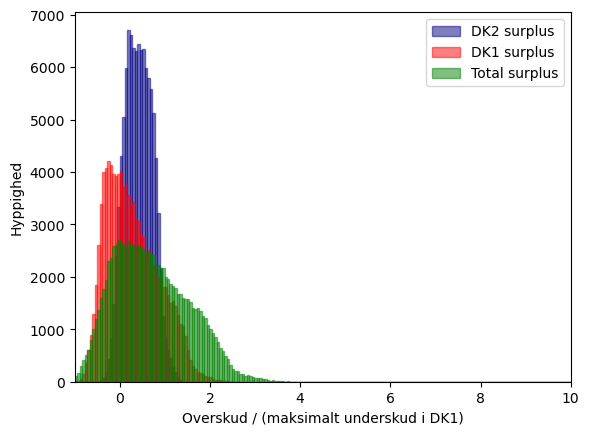

In [42]:

binsDK1 = np.linspace(-1,10,200)
plt.hist(-surplusDK2/min(surplusDK1),alpha=0.5,bins=binsDK1,label="DK2 surplus",edgecolor = "navy",color = "navy")
plt.hist(-surplusDK1/min(surplusDK1),alpha=0.5,bins=binsDK1,label="DK1 surplus",edgecolor = "red",color = "red")
plt.hist(-surplusBoth/min(surplusDK1),alpha=0.5,bins=binsDK1,label="Total surplus",edgecolor = "green",color = "green")
plt.legend()
plt.xlabel("Overskud / (maksimalt underskud i DK1)")
plt.ylabel("Hyppighed")
plt.xlim(-1,10)

Der er tydeligvis stadig mange timer hvor der i Danmark totalt er underskud. En anden mulighed er at jeg har misforstået værdierne for kapacitet på de varierende produktioner. Det, der står, kunne i stedet være gennemsnit? I så fald skal jeg dividere med gennemsnitsværdien i timeserien. Jeg prøver at udføre en simulation med dette:

(-1.0, 10.0)

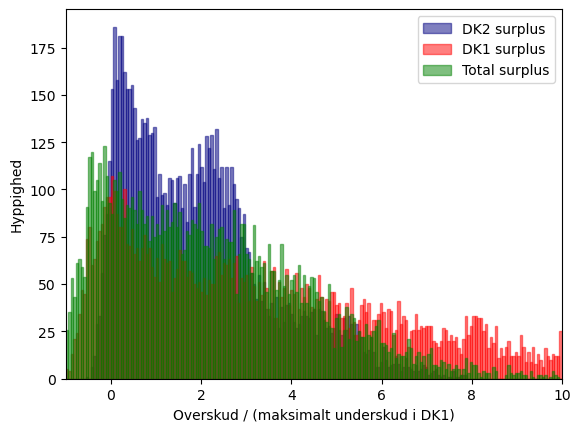

In [40]:
newTest = ResultsFile("../results/2030_1985_test_averages.txt")
surplusDK1 = newTest.getColumn("DK1_surplus")
surplusDK2 = newTest.getColumn("DK2_surplus")
surplusBoth = newTest.getColumn("DK2_surplus")+files[0].getColumn("DK1_surplus")

binsDK1 = np.linspace(-1,10,200)
plt.hist(-surplusDK2/min(surplusDK1),alpha=0.5,bins=binsDK1,label="DK2 surplus",edgecolor = "navy",color = "navy")
plt.hist(-surplusDK1/min(surplusDK1),alpha=0.5,bins=binsDK1,label="DK1 surplus",edgecolor = "red",color = "red")
plt.hist(-surplusBoth/min(surplusDK1),alpha=0.5,bins=binsDK1,label="Total surplus",edgecolor = "green",color = "green")
plt.legend()
plt.xlabel("Overskud / (maksimalt underskud i DK1)")
plt.ylabel("Hyppighed")
plt.xlim(-1,10)